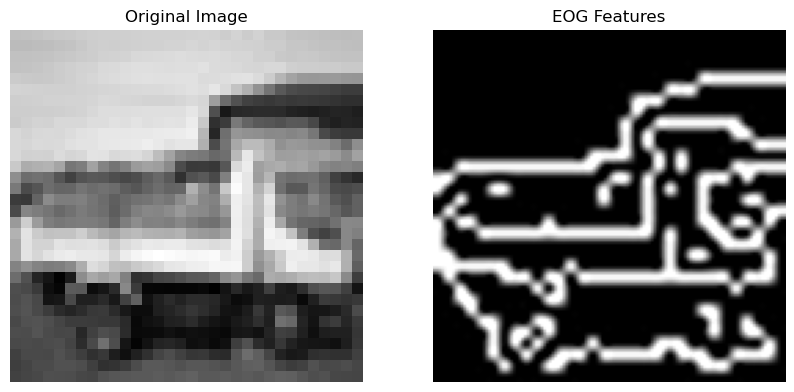

In [15]:
import cv2
import numpy as np
from PIL import Image
import os

# 输入图像路径
img_path = "../../data/train_ims/0a0fc1e.jpg"  # 替换为实际图像路径
output_dir_eog = "../../data/train_eog_ims"  # 输出目录
os.makedirs(output_dir_eog, exist_ok=True)  # 确保输出目录存在

# 读取图像并转换为灰度图像
img = Image.open(img_path).convert("L")  # 转换为灰度图像
img_gray = np.array(img)

# 调整图像大小
# img_gray = cv2.resize(img_gray, (128, 128), interpolation=cv2.INTER_CUBIC)

# 使用 Canny 边缘检测提取 EOG 特征
edges = cv2.Canny(img_gray, 100, 200)

edges = cv2.resize(edges, (128, 128), interpolation=cv2.INTER_CUBIC)

import matplotlib.pyplot as plt

# 显示原始图像和边缘检测结果
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("EOG Features")
plt.axis('off')
plt.show()



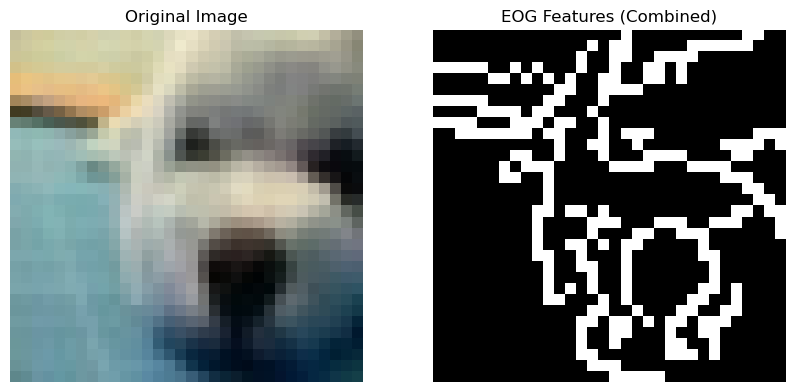

EOG 特征图像已保存到: ../../data/train_eog_ims/0a0e9c7_eog_combined.jpg


In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# 输入图像路径
img_path = "../../data/train_ims/0a0e9c7.jpg"  # 替换为实际图像路径
output_dir_eog = "../../data/train_eog_ims"  # 输出目录
os.makedirs(output_dir_eog, exist_ok=True)  # 确保输出目录存在

# 读取彩色图像
img_color = cv2.imread(img_path)
# img_color = cv2.resize(img_color, (128, 128), interpolation=cv2.INTER_CUBIC)  # 调整大小

# 对彩色图像的每个通道分别进行 Canny 边缘检测
edges_b = cv2.Canny(img_color[:, :, 0], 100, 200)  # 蓝色通道
edges_g = cv2.Canny(img_color[:, :, 1], 100, 200)  # 绿色通道
edges_r = cv2.Canny(img_color[:, :, 2], 100, 200)  # 红色通道

# 合并三个通道的边缘检测结果
edges_combined = cv2.bitwise_or(edges_b, edges_g)
edges_combined = cv2.bitwise_or(edges_combined, edges_r)

# 显示原始图像和边缘检测结果
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))  # 转换为 RGB 格式以正确显示颜色
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(edges_combined, cmap='gray')
plt.title("EOG Features (Combined)")
plt.axis('off')
plt.show()

# 保存边缘检测结果
img_name = os.path.splitext(os.path.basename(img_path))[0]
eog_image_path = os.path.join(output_dir_eog, f"{img_name}_eog_combined.jpg")
cv2.imwrite(eog_image_path, edges_combined)

print(f"EOG 特征图像已保存到: {eog_image_path}")

In [16]:
from skimage import feature
import cv2
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "../../data/train.csv"
img_dir = "../../data/train_ims"
output_dir_eog = "../../data/train_eog_ims2"
output_dir_hist = "../../data/train_hist_ims"
data = pd.read_csv(csv_path)

X_eog = []
X_hist = []
y = []

for _, row in tqdm(data.iterrows(), total=len(data), desc="Processing Images"):
    img_path = os.path.join(img_dir, row.iloc[0])
    label = int(row.iloc[1])
    img_name = os.path.splitext(row.iloc[0])[0]
    img = Image.open(img_path).convert("L")  # 转换为灰度图像
    img_gray = np.array(img)
    
    # img_gray = cv2.resize(img_gray, (128, 128), interpolation=cv2.INTER_CUBIC)

    # **EOG 特征提取**
    edges = cv2.Canny(img_gray, 100, 200)  # 使用 Canny 边缘检测
    edges = cv2.resize(edges, (128, 128), interpolation=cv2.INTER_CUBIC)  # 调整大小
    
    eog_image_path = os.path.join(output_dir_eog, f"{img_name}.jpg")
    cv2.imwrite(eog_image_path, edges)  # 保存边缘图像
    # X_eog.append(edges.flatten())  # 将边缘图像展平作为特征

    # **HIST 特征提取**
    # hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])  # 计算灰度直方图
    # hist = hist.flatten()  # 展平直方图
    # hist_image_path = os.path.join(output_dir_hist, f"{img_name}.jpg")
    # plt.figure()
    # plt.plot(hist)  # 绘制直方图
    # plt.savefig(hist_image_path)
    # plt.close()
    # X_hist.append(hist)  # 将直方图作为特征

    # y.append(label)

# 转换为 NumPy 数组
X_eog = np.array(X_eog)
X_hist = np.array(X_hist)
y = np.array(y)

Processing Images: 100%|██████████| 50000/50000 [00:16<00:00, 3041.74it/s]
